In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [14]:
!pip install graphviz


In [15]:
data=pd.read_csv('petrol_consumption.csv')
data.shape

(48, 5)

In [16]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [17]:
print(data.dtypes)

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
None


In [19]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [20]:
print(data.describe())


       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000  


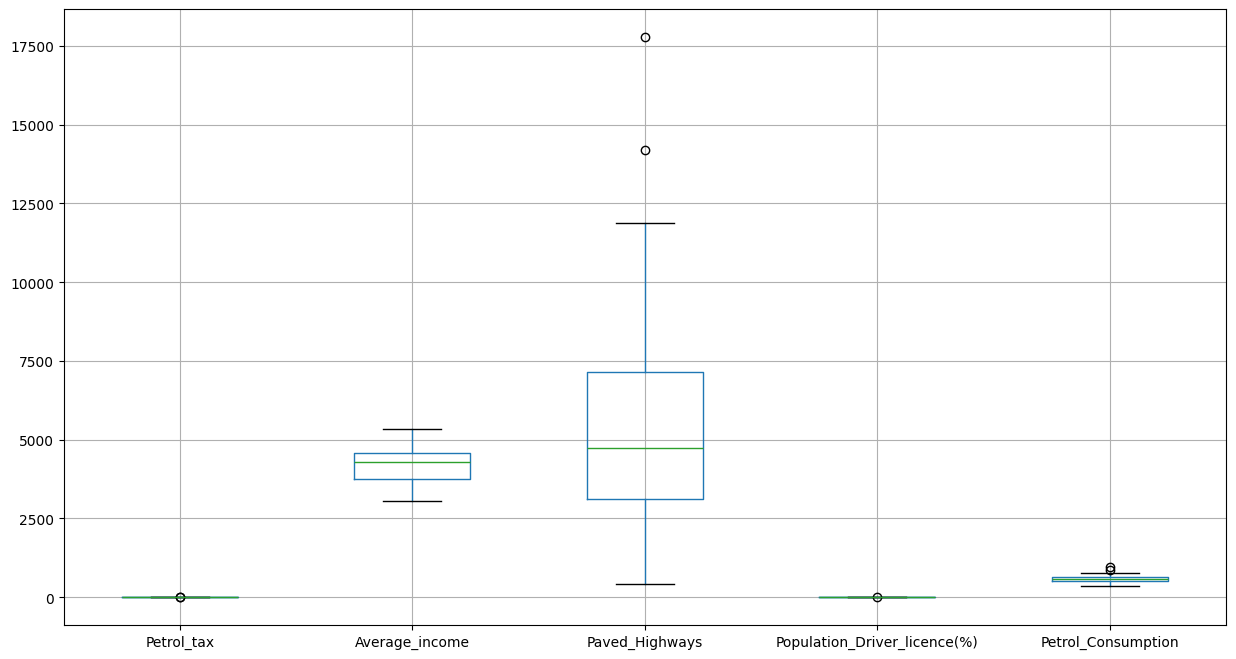

In [21]:
plt.figure(figsize=(15, 8))
data.boxplot()
plt.show()

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [23]:
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [24]:
print("Taille des données après nettoyage : ", data_cleaned.shape)


Taille des données après nettoyage :  (43, 5)


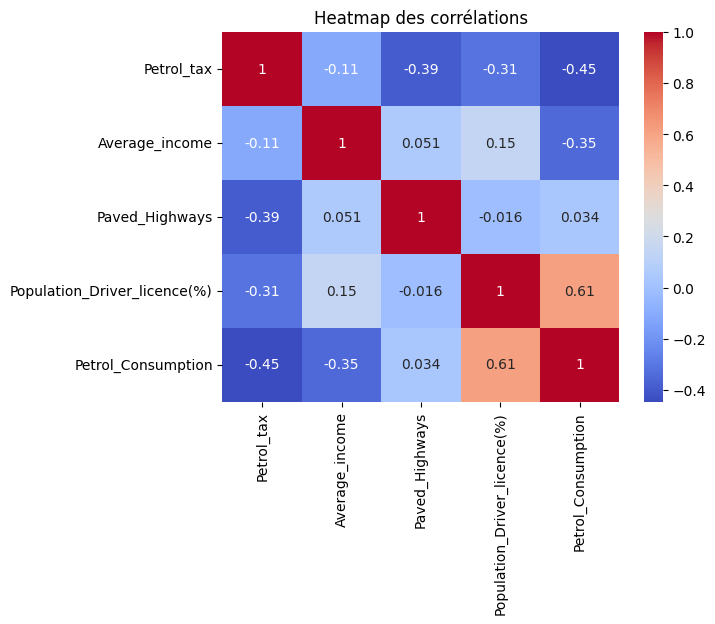

In [25]:
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

la corrélation entre la variable Population_Driver_licence(%) et les autres variables (y compris la cible Petrol_Consumption) corrélation de Pearson

In [26]:
predictor_var=data_cleaned[['Petrol_tax','Average_income','Paved_Highways',
                         'Population_Driver_licence(%)']]

In [27]:
target_var = data_cleaned['Petrol_Consumption']


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor_var, target_var, test_size=0.3, random_state=123)


In [33]:
from sklearn.tree import DecisionTreeRegressor

# Créer un modèle d'arbre de décision pour la régression
tree = DecisionTreeRegressor(max_depth=4, max_features=4, criterion='squared_error')
tree.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=4, max_features=4)

In [34]:
# Prédire sur l'ensemble de test
predictions = tree.predict(X_test)

In [35]:
# Comparer les valeurs réelles et prédites
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
print(df.head(5))


    Actual   Predicted
26     577  589.333333
13     508  589.333333
29     534  487.000000
14     566  645.250000
24     460  504.000000


In [36]:
# Visualiser l'arbre de décision
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Sauvegarder l'arbre en fichier .pdf ou .png
graph.view()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH